<a href="https://colab.research.google.com/github/futureCodersSE/python-programming-for-data/blob/main/Worksheets/Air_quality_mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clean and wrangle air quality data

The following data file contains data collected at a roadside monitoring station.  You can see the data in a spreadsheet here: https://docs.google.com/spreadsheets/d/1XpAvrpuyMsKDO76EZ3kxuddBOu7cZX1Od4uEts14zco/edit?usp=sharing

The data contains:
* a heading line (Chatham Roadside) which needs to be skipped
* dates which are sometimes left- and sometimes right-justified indicating that they are not formatted as dates, rather they are text (so need to be converted to dates)
* times which are not all in the same format
* Nitrogen Dioxide levels which are, again, text and sometimes contain nodata
* Status which is always the same





### Project - clean, sort and wrangle the data

Read the dataset into a dataframe, skipping the first row   
Convert dates to date format  
Remove rows with nodata in the Nitrogen dioxide column  
Convert the Nitrogen dioxide levels values to float type  
Sort by Nitrogen dioxide level  
Create a new column for 'Weekdays' (use df['Date'].dt.weekday)  
Rename the column Nitrogen dioxide level to NO2 Level (V ug/m2)  
Remove the Status column  

The dataset can be viewed here:  https://drive.google.com/file/d/1aYmBf9il2dWA-EROvbYRCZ1rU2t7JwvJ/view?usp=sharing  and the data accessed here: https://drive.google.com/uc?id=1QSNJ3B1ku8kjXsA_tCBh4fbpDK7wVLAA This is a .csv file  

**NOTE:** Some useful references are included at the bottom of this spreadsheet.

Use the code cell below to work your code.

In [66]:
import pandas as pd

### Approach 1:

In [63]:
# Read the dataset into a dataframe, skipping the first row   
df = pd.read_csv(r'https://drive.google.com/uc?id=1QSNJ3B1ku8kjXsA_tCBh4fbpDK7wVLAA', skiprows=1)

# clean column headings
df.columns = [c.lower().replace(' ', '_') for c in df.columns]

# Convert dates to date format 
df['time'] = df['time'].str.replace('24:00:00', '00:00')
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'], format=r'%d/%m/%Y %H:%M')

# Remove rows with nodata in the Nitrogen dioxide column  
df = df.query('nitrogen_dioxide != "nodata"') # OR: df[(df['nitrogen_dioxide'] != 'nodata')]

# Convert the Nitrogen dioxide levels values to float type  
df['nitrogen_dioxide'] = df['nitrogen_dioxide'].astype(float)

# Sort by Nitrogen dioxide level  
df = df.sort_values(by='nitrogen_dioxide', ignore_index=True)

# Create a new column for 'Weekdays' (use df['Date'].dt.weekday)  
df['weekday'] = df['datetime'].dt.weekday

# Rename the column Nitrogen dioxide level to NO2 Level (V ug/m2)  
df = df.rename(columns={'nitrogen_dioxide': 'NO2 Level (V ug/m2)'})

# Remove the Status column
df = df.drop(columns=['date', 'time', 'status'])

df = df.set_index('datetime')
df.head(3)

,NO2 Level (V ug/m2),weekday
datetime,,
2020-05-23 11:00:00,0.31041,5
2020-08-31 13:00:00,0.38390,0
2020-11-16 05:00:00,0.40116,0


### Approach 2:

In [70]:
def clean_columns(df: pd.DataFrame) -> pd.DataFrame:
    df.columns = [col.lower().replace(' ', '_') for col in df.columns]
    return df


def clean_no2_data(url: str) -> pd.DataFrame:
    return (
        pd.read_csv(url, skiprows=1)
        .pipe(clean_columns)
        .query('nitrogen_dioxide != "nodata"')
        .pipe(lambda df: df.assign(
            nitrogen_dioxide=df['nitrogen_dioxide'].astype(float),
            datetime=pd.to_datetime(df['date'] + ' ' + df['time'].str.replace('24:00:00', '00:00').replace('24:00', "00:00"), format=r'%d/%m/%Y %H:%M')))
        .assign(weekday=lambda df: df['datetime'].dt.dayofweek)
        .sort_values(by='nitrogen_dioxide', ignore_index=True)
        .rename(columns={'nitrogen_dioxide': 'NO2 Level (V ug/m2)'})
        .drop(columns=['date', 'time', 'status'])
        .set_index('datetime')
        )


df = clean_no2_data(url=r'https://drive.google.com/uc?id=1QSNJ3B1ku8kjXsA_tCBh4fbpDK7wVLAA')
df.head(3)

,NO2 Level (V ug/m2),weekday
datetime,,
2020-05-23 11:00:00,0.31041,5
2020-08-31 13:00:00,0.38390,0
2020-11-16 05:00:00,0.40116,0


### Expand the dataset and show summary statistics for larger dataset
---

There is a second data set here covering the year 2021:  https://drive.google.com/uc?id=1aYmBf9il2dWA-EROvbYRCZ1rU2t7JwvJ  

Concatenate the two datasets to expand it to 2020 and 2021.  

Before you can concatenate the datasets you will need to clean and wrangle the second dataset in the same way as the first.  Use the code cell below.  Give the second dataset a different name. 

After the datasets have been concatenated, group the data by Weekdays and show summary statistics by day of the week.

In [75]:
df2 = clean_no2_data(url=r'https://drive.google.com/uc?id=1aYmBf9il2dWA-EROvbYRCZ1rU2t7JwvJ')
df2.head(3)

,NO2 Level (V ug/m2),weekday
datetime,,
2021-10-27 02:00:00,-0.77743,2
2021-10-20 02:00:00,-0.54076,2
2021-10-24 04:00:00,-0.41740,6


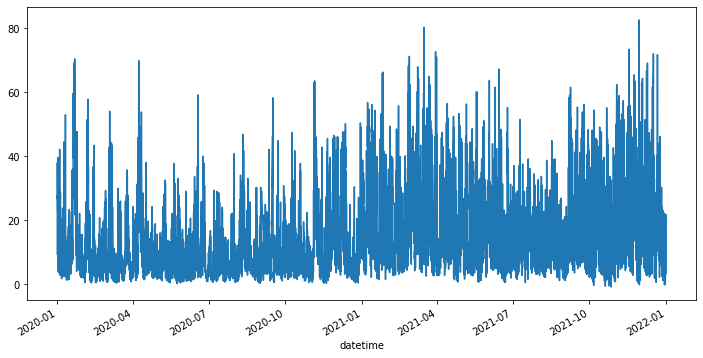

In [74]:
pd.concat([df, df2], axis=0)['NO2 Level (V ug/m2)'].plot(figsize=(12, 6));

### Helpful references
---
Skipping rows when reading datasets:  
https://www.geeksforgeeks.org/how-to-skip-rows-while-reading-csv-file-using-pandas/  

Converting strings to dates:  
https://www.geeksforgeeks.org/convert-the-column-type-from-string-to-datetime-format-in-pandas-dataframe/

Dropping rows where data has a given value:  
https://www.datasciencemadesimple.com/drop-delete-rows-conditions-python-pandas/  
(see section Drop a row or observation by condition) 

Convert a column of strings to a column of floats:
https://datatofish.com/convert-string-to-float-dataframe/  

Create a new column from data converted in an existing column:  
https://www.geeksforgeeks.org/create-a-new-column-in-pandas-dataframe-based-on-the-existing-columns/  

Rename a column:  
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html  

Remove a column by name:  
https://www.kite.com/python/answers/how-to-delete-columns-from-a-pandas-%60dataframe%60-by-column-name-in-python#:~:text=Use%20the%20del%20keyword%20to,the%20name%20column_name%20from%20DataFrame%20.
